 # **Car Price Prediction**

 This project involves predicting the selling price of a car using a dataset with various features such as car name, year, selling price, present price, driven kilometers, fuel type, selling type, transmission, and owner.

 We will use a machine learning technique to build the prediction model.

 ### **Libraries**

In [16]:
# %%
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


 ### **Project Pipeline**

 For this machine learning project, it consists of three main phases:

 1. **Scoping:** List the problem description and project goals

 2. **The Data:** Load, analyze, and prepare the dataset for training

 3. **The Model:** Create and train the model on the dataset

 ## **1 | Scoping**

 The project problem is that we have a dataset containing various car features, and we will use machine learning to predict the selling price of a car based on these features.

 ## **2 | The Data**

 In this phase, we will analyze and prepare the dataset before training by applying various steps as follows:

 1. Data Loading

 2. Data Visualization

 3. Data Cleaning

 4. Data Splitting

 ##### **1. Data Loading**

 Load the dataset and show its info and statistics

In [17]:
# %%
# Load the dataset
dataset = pd.read_csv('data.csv')
dataset.shape


(301, 9)

In [18]:
# %%
# Show dataset head (first 5 records)
dataset.head() 


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
# %%
# Show dataset statistics
dataset.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


 ##### **2. Data Visualization**

 Visualize dataset features to get some insights

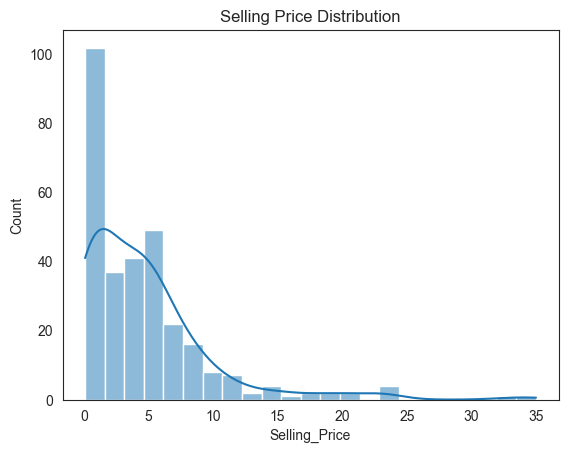

In [20]:
# %%
# Visualize distribution of car prices
plt.figure(dpi=100)
sns.histplot(dataset['Selling_Price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()


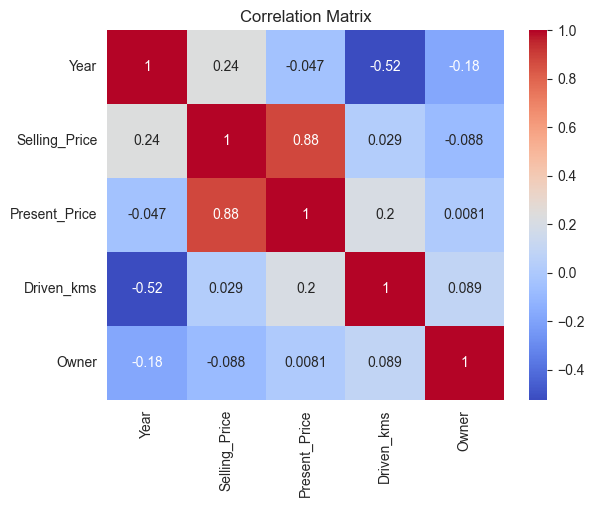

In [21]:
# Select only numeric columns for correlation
numeric_columns = dataset.select_dtypes(include=[np.number])

# Visualize correlation between features
plt.figure(dpi=100)
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



 ##### **3. Data Cleaning**

 Handle missing values and check for duplicates

In [22]:
# %%
# Check for missing data for each column 
dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [23]:
# %%
# Check for duplicates and remove them 
dataset.drop_duplicates(inplace=True)


 ##### **4. Data Splitting**

 Split the dataset into training and testing sets

In [24]:
# %%
# Select features (X) and target variable (y)
X = dataset[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = dataset['Selling_Price']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


 ## **3. The Model**

 In this phase, we will create and train a linear regression model

In [25]:
# %%
# Model creation
model = LinearRegression()


In [26]:
# %%
# Model training
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# %%
# Model predictions on test set
y_pred = model.predict(X_test)


In [28]:
# %%
# Model Evaluation | Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse


np.float64(4.231260505569814)

In [29]:
# %%
# Model Evaluation | R2 Score
r2 = r2_score(y_test, y_pred)
r2


0.7581011893942224

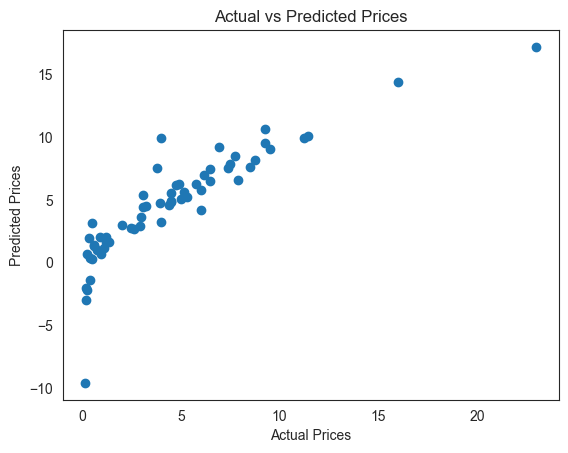

In [30]:
# %%
# Visualization of actual vs predicted prices
plt.figure(dpi=100)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
